### What is Generative AI?

Generative AI refers to a category of artificial intelligence that focuses on creating, rather than simply processing or analyzing data. Unlike traditional AI systems that rely on explicit programming to perform specific tasks, generative AI employs machine learning techniques, particularly generative models, to generate new content or data that resembles, and produces output beyond what is being trained on.

### Application of Generative AI

##### Text generation:
Generative AI models can generate text in a variety of formats, including news articles, poems, code, and scripts.
##### Image generation:
It can generate realistic images of people, places, and objects that do not exist.
##### Music generation:
Generative AI is also capable of generating music in a variety of genres, including classical, jazz, and pop.


### Popular platforms Utilizing Gen AI

#### Text: GPT-3
A large language model from OpenAI, can generate realistic and coherent text that is very similar to human-written text. It is used for writing emails, cover letters, resume etc

#### Image: DALL-E 2
A generative AI model, that can generate images based on the text descriptions provided by user.

#### Music: Jukebox
A generative AI model from Google AI, can generate music that is indistinguishable from human-composed music.

#### Code generation: GitHub Copilot
A generative AI tool from GitHub, can generate code suggestions and complete code snippets that helps ease the development process

# Following are few images generated using Gen AI

### Prompt:
"beautiful-young-woman-with-red-hair-field-flowers"

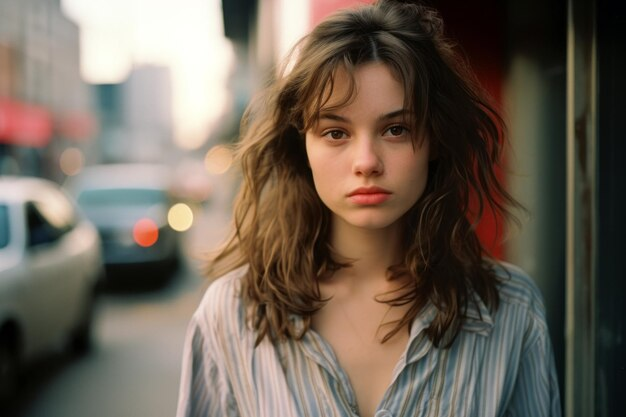

In [10]:
Image('f.jpg')

### Prompt:
"portrait-young-woman-city-street"

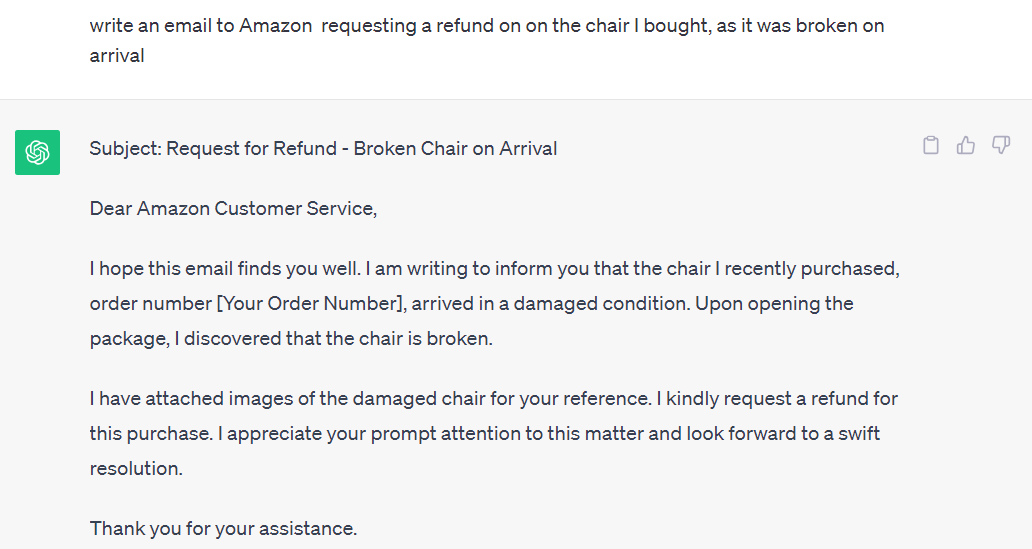

In [11]:
Image('gpt.png')

Generative AI, a type of artificial intelligence, creates new data like text, images, music, and code, showcasing promising results in various tasks, notably data generation.

## Significance:
Data generation is crucial for tailoring data to specific needs using generative AI:

#### Generative AI overcomes limitations in real-world datasets by generating data for tasks with limited availability or high collection costs.
    
#### In healthcare research, where obtaining large, diverse datasets can be challenging, generative AI proves instrumental by generating synthetic data for experimentation.
    
#### Allows simulation of scenarios that are challenging or impossible to replicate in the real world, aiding hypothesis testing and validation.
    
#### Provides valuable data for training machine learning models, enhancing their performance across various applications.

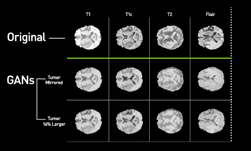

In [12]:
Image('MRI_Feature1.png')

## Worked Example

### Question Answer chatbot using BERT(Bidirectional Encoder Representations from Transformers) Architecture

In [ ]:
! pip install transformers &>null
! pip install datasets &>null

In [ ]:
! pip install accelerate -U &>null
! pip install transformers[torch] &>null

In [2]:
from IPython.display import Image
from google.colab import files

In [9]:
img1 = files.upload()

Saving f.jpg to f.jpg
Saving gpt.png to gpt.png
Saving MRI_Feature1.png to MRI_Feature1.png


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import BertTokenizer, BertForQuestionAnswering
from transformers import TrainingArguments, Trainer
from datasets import load_dataset, load_metric
import numpy as np

## BERT

### Context Understanding:
BERT reads sentences bidirectionally, capturing the meaning of each word based on its surroundings, crucial for understanding questions and answers in context.

### Bidirectional Attention:
Unlike other models, BERT considers the entire input at once, helping it grasp relationships between words, important for understanding the flow of information in Q&A.

### Pre-training Advantage:
BERT is pretrained on vast amounts of text, learning general language patterns, making it a strong foundation for understanding various linguistic nuances in Q&A tasks.

### Attention Mechanism in BERT:

BERT uses self-attention mechanisms that enable parallel processing of input tokens, making them computationally efficient compared to sequential models.

 The attention mechanism in transformers provides interpretability and capture relationships between words regardless of their distance in a sentence

BERT uses MLM(masked language modeling) for context understanding.

In MLM, BERT is given a sentence with some of the words replaced with "[MASK]". The model's task is to predict the original words that were masked. This helps BERT to learn the relationships between words in a sentence and to develop a deep understanding of the meaning of language.


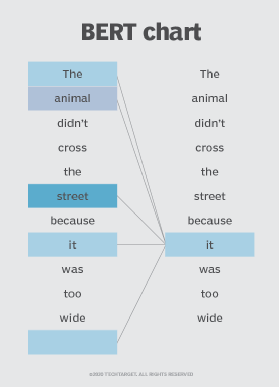

In [4]:
Image('bert.png')

In [ ]:
# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

(…)squad/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)g-finetuned-squad/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)etuned-squad/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)finetuned-squad/resolve/main/config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

### Tokenization:

It is the process of breaking down a piece of text into smaller units called tokens and assigning a numerical value to each token. This numerical representation allows BERT to process and understand the text more effectively.

BERT uses a subword-based tokenization approach, which means that it can break down unknown words into smaller subwords.

In [ ]:
# Load the dataset
dataset = load_dataset("/content/drive/MyDrive/Colab Notebooks/WikiQACorpus", data_files={"train": "WikiQA-train.tsv", "validation": "WikiQA-dev.tsv", "test": "WikiQA-test.tsv"}, delimiter='\t', quoting=3)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

### What are Q and A models

A Q&A model in generative AI is a type of AI that can answer questions. It is trained on large amounts of text data and can answer questions in a comprehensive and informative way. Q&A models are used in a variety of applications, including search engines, virtual assistants, chatbots, and education.

BERT for Question Answering (Q&A) typically accepts input data in a specific format. The key components include:

### Context or Passage:
The passage of text where the model will search for the answer. This is often referred to as the "context" or "paragraph."

### Question:
The actual question you want the model to answer. This is what you are seeking information about within the given context.

### Special Tokens:
BERT requires special tokens to delineate the context and question. Commonly used tokens include [CLS] (for the start of the sequence) and [SEP] (to separate different parts of the input).

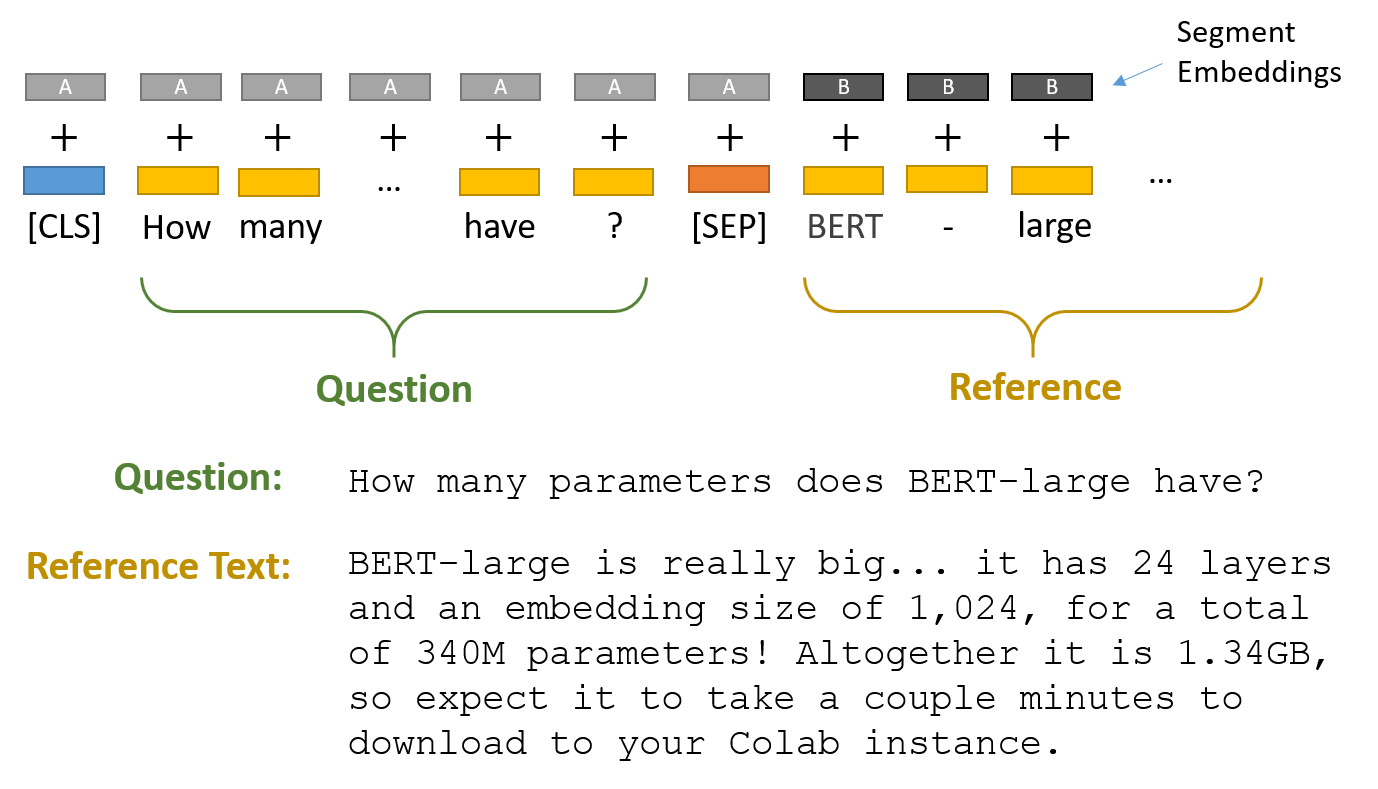

In [7]:
Image('qa.png')

In [ ]:
# Preprocess the dataset
def preprocess_function(examples):
    questions = examples["Question"]
    sentences = examples["Sentence"]
    labels = examples["Label"]

    # Tokenize questions and sentences
    tokenized_examples = tokenizer(questions, sentences, padding="max_length", truncation=True, max_length=256)

    # Initialize start_positions and end_positions
    start_positions = []
    end_positions = []

    for i in range(len(questions)):
        # If the sentence has the answer
        if labels[i] == 1:
            # The start position is the start of the sentence
            start_positions.append(0)
            # The end position is the end of the sentence
            end_positions.append(len(tokenizer(sentences[i], add_special_tokens=False)["input_ids"]) - 1)
        else:
            # If no answer, set start and end positions to 0
            start_positions.append(0)
            end_positions.append(0)


    tokenized_examples["start_positions"] = start_positions
    tokenized_examples["end_positions"] = end_positions

    return tokenized_examples


In [ ]:
tokenized_datasets = dataset.map(preprocess_function, batched=True)
tokenized_datasets.set_format("torch")

Map:   0%|          | 0/20360 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Map:   0%|          | 0/2733 [00:00<?, ? examples/s]

Map:   0%|          | 0/6165 [00:00<?, ? examples/s]

The "bert-large-uncased-whole-word-masking-finetuned-squad" model is a variant of BERT (Bidirectional Encoder Representations from Transformers) that has been pre-trained on a large corpus of text and fine-tuned for the Stanford Question Answering Dataset (SQuAD)

In [ ]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Defining Hyperparameters for training

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    fp16=True,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=5,
    weight_decay=0.01,
)

### Training and Evaluating loss on train and validation dataset

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    # compute_metrics= compute_metrics,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.167300,0.179540
2,0.119800,0.171952
3,0.081800,0.235851
4,0.030000,0.267451
5,0.012400,0.308464


TrainOutput(global_step=12725, training_loss=0.08927127800662298, metrics={'train_runtime': 3400.2839, 'train_samples_per_second': 29.939, 'train_steps_per_second': 3.742, 'total_flos': 4.72711858993152e+16, 'train_loss': 0.08927127800662298, 'epoch': 5.0})

### Evaluation Matrix:

In SQuAD matrix each example in dataset would have a pair of start and end positions that represent the span of the correct answer in the context.

The model's predicted start and end positions are then compared to these true labels during evaluation to assess how well the model is performing in terms of locating the correct answer in the given context

In [ ]:
# ! pip install evaluate

metric = load_metric('squad_v2')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    # Implement metric computation
    return metric.compute(predictions=predictions, references=labels)
    # return {"accuracy": acc, "f1": f1}

# trainer.evaluate(eval_dataset=tokenized_datasets['test'], compute_metrics=compute_metrics)
trainer.evaluate(eval_dataset=tokenized_datasets['test'])

<ipython-input-13-bf83459d223b>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('squad_v2')


{'eval_loss': 0.3075641691684723,
 'eval_runtime': 55.9471,
 'eval_samples_per_second': 110.193,
 'eval_steps_per_second': 27.562,
 'epoch': 5.0}

In [ ]:
def answer_question(question, context, model, tokenizer, device='cuda'):
    # Encode the question and context
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

    # Move the tensors to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Perform inference
    outputs = model(**inputs)

    # Extract logits
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Find the position of the start and end of the answer in the context
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    # Convert ids to tokens and join them to form the answer string
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))

    return answer


### Runing on user provided question and context

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# Example context and question
context =  "They are often called ice caves, but this term is properly used to describe bedrock caves that contain year-round ice. This water often originates on the glacier's surface through melting, entering the glacier at a sinkhole or moulin."
question = "How are glacier caves formed"

# Get the answer
answer = answer_question(question, context, model, tokenizer)
print("Answer:", answer)


Answer: [CLS] how are glacier caves formed [SEP] glacier caves are formed by the melting of ice and flowing of water through and under glaciers . they are often called ice caves , but this term is properly used to describe bedrock caves that contain year - round ice . most glacier caves are started by water running through or under the glacier . this water often originates on the glacier ' s surface through melting , entering the glacier


### Saving model and tokenizer

In [ ]:
model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/Model_Tokenizer/bert_QA_m3/bert_model")

In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/Model_Tokenizer/bert_QA_m3/bert_token")

('/content/drive/MyDrive/Colab Notebooks/Model_Tokenizer/bert_QA_m3/bert_token/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/Model_Tokenizer/bert_QA_m3/bert_token/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/Model_Tokenizer/bert_QA_m3/bert_token/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/Model_Tokenizer/bert_QA_m3/bert_token/added_tokens.json')

### References:

### The WikiQA Corpus dataset:
https://www.microsoft.com/enus/download/confirmation.aspx?id=52419

### Pre-trained Transformer-based chatbot models:
BERT: https://github.com/google-research/bert

GPT: https://github.com/openai/gpt-2